In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import somsphere
import healpy as hp
import numpy as np
import time

data = "resources/SDSS_MGS.train"

In [17]:
#just read magnitudes and colors
Data_X=np.loadtxt(data, usecols=(1,2,3,4,5,6,7,8,9), unpack=True).T
np.shape(Data_X)

(5000, 9)

In [18]:
#read zspec (or any other extra column)
Data_Y=np.loadtxt(data, usecols=(0,), unpack=True).T
np.shape(Data_Y)

(5000,)

In [19]:
#create an instance
M=somsphere.SOMap(topology='grid', n_top=15, n_iter=100, periodic=False)

In [21]:
start = time.time()
M.create_map(Data_X, Data_Y) #This actually creates the map using only Data_X
print(f"Finished in {time.time() - start}")

Finished in 27.136485815048218


In [22]:
M.evaluate_map() # Will evaluate Data_Y, basically will take mean for every value of Y per cell

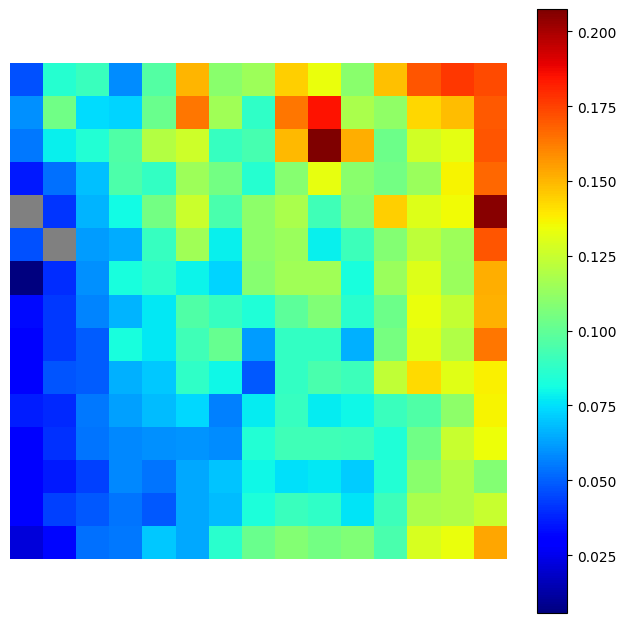

In [23]:
M.plot_map()

In [24]:
#We can evaluate other column, for example column 0 from X
M.evaluate_map(input_y=Data_X[:,0])

In [27]:
M.plot_map()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 800x800 with 0 Axes>

In [28]:
#Every time the map is created it will be different given the random weights
M.create_map(Data_X, Data_Y)

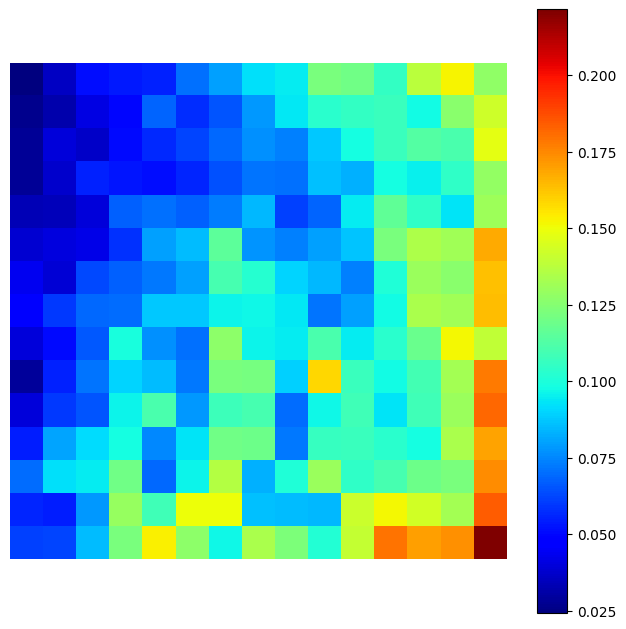

In [29]:
M.evaluate_map()
M.plot_map()

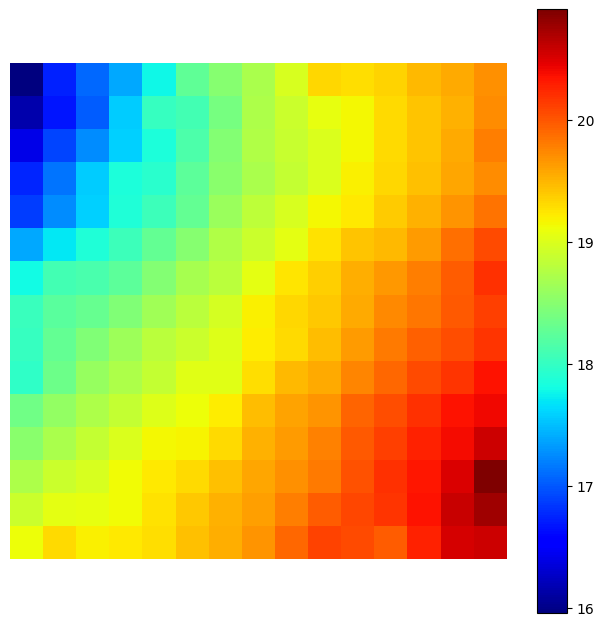

In [30]:
M.evaluate_map(input_y=Data_X[:,0])
M.plot_map()

In [31]:
#Spherical coordinates
M_sph=somsphere.SOMap(topology='sphere', n_top=8, n_iter=100)

In [33]:
M_sph.create_map(Data_X, Data_Y)

In [ ]:
M_sph.evaluate_map()
M_sph.plot_map()


In [ ]:
M_sph.evaluate_map(input_y=Data_X[:,0])
M_sph.plot_map()

## Test with fixed weights and fixed order of data presented

In [ ]:
# To test with fixed weights, so answer is always the same (to be able to compare)
# need more iterations to make sure it converges
M=somsphere.SOMap(Data_X, Data_Y,topology='grid', n_top=15, n_iter=300, periodic=False)
print(M.n_dim, 'dimensions') #dimensions
print(M.n_pix, 'cells') #cells

In [ ]:
#weights are supposed to be random, but we can make them linear for testing
W = np.linspace(0,20,M.n_dim*M.n_pix).reshape(M.n_dim,M.n_pix)
#look carefully onhow this was created, elements go from 0 to 20 with a difference of 
#W[0][1]-W[0][0] = 0.009881422924901186
print('dw = ', W[0][1]-W[0][0])
np.shape(W)

In [ ]:
M.create_map(inputs_weights=W, random_order=False)

In [ ]:
M.evaluate_map()

In [ ]:
M.plot_map()

In [ ]:
# If I create the map again, results should be the same
M.create_map(inputs_weights=W, random_order=False)
M.evaluate_map()
M.plot_map()

In [ ]:
# To compare, we can use the resulting weights for cell 0
M.weights[:,0]

In [ ]:
# in spherical
M_sph=somsphere.SOMap(Data_X, Data_Y,topology='sphere', n_top=8, n_iter=300)

In [ ]:
#weights, the number of pixels is different
#weights are supposed to be random, but we can make them linear for testing
W = np.linspace(0,20,M_sph.n_dim*M_sph.n_pix).reshape(M_sph.n_dim,M_sph.n_pix)
#look carefully onhow this was created, elements go from 0 to 20 with a difference of 
#W[0][1]-W[0][0] = 0.009881422924901186
print('dw = ', W[0][1]-W[0][0])
np.shape(W)


In [ ]:
M_sph.create_map(inputs_weights=W, random_order=False)

In [ ]:
M_sph.evaluate_map()
M_sph.plot_map()

In [ ]:
M_sph.evaluate_map(input_y=Data_X[:,0])
M_sph.plot_map()


In [ ]:
M_sph.create_map(inputs_weights=W, random_order=False)

In [ ]:
M_sph.evaluate_map()
M_sph.plot_map()

In [ ]:
#Weights for cell 0
M_sph.weights[:,0]

In [ ]:
# hexagonal topology with periodic conditions
M_hex=somsphere.SOMap(Data_X, Data_Y,topology='hex', n_top=15, n_iter=300, periodic=True)
print(M_hex.n_dim, 'dimensions') #dimensions
print(M_hex.n_pix, 'cells') #cells

In [ ]:
W=np.linspace(0,20,M_hex.n_dim*M_hex.n_pix).reshape(M_hex.n_dim,M_hex.n_pix)
M_hex.create_map(inputs_weights=W, random_order=False)
M_hex.evaluate_map()
M_hex.plot_map()

In [ ]:
M_hex.evaluate_map(input_y=Data_X[:,0])
M_hex.plot_map()

# Random example test

In [ ]:
X_R=np.random.rand(45000).reshape(5000,9)

In [ ]:
np.shape(X_R)

In [ ]:
M_sph_R=somsphere.SOMap(X_R, X_R[:,0],topology='sphere', n_top=8, n_iter=100)

In [ ]:
M_sph_R.create_map()

In [ ]:
M_sph_R.evaluate_map()

In [ ]:
M_sph_R.plot_map()

In [ ]:
M_sph_R.evaluate_map(input_y=X_R[:,0])

In [ ]:
M_sph_R.plot_map()

In [ ]:
plt.plot(X_R[:,0],'k.')

In [ ]:
M_sph_R.ivals[0]


In [ ]:
HR=np.zeros(M_sph_R.npix)
MR=np.zeros(M_sph_R.npix)
for i in xrange(M_sph_R.npix):
    try:
        HR[i]=len(M_sph_R.ivals[i])
        MR[i]=np.mean(M_sph_R.yvals[i])
    except:
        pass

In [ ]:
plt.plot(H)

In [ ]:
plt.plot(MM)

In [ ]:
np.mean(H), np.mean(MM)

In [ ]:
H[0]

In [ ]:
np.std(H)

In [ ]:
plt.hist(H, bins=15)


In [ ]:
plt.figure()
plt.hist(MM, bins=20)

In [ ]:
plt.hist(M_sph_R.weights[4])

In [ ]:
len(M_sph_R.weights[0])

In [ ]:
M_sph=somsphere.SOMap(Data_X, Data_Y,topology='sphere', n_top=8, n_iter=100)

In [ ]:
M_sph.create_map()

In [ ]:
M_sph.evaluate_map()

In [ ]:
M_sph.plot_map()

In [ ]:
H=np.zeros(M_sph.npix)
MM=np.zeros(M_sph.npix)
for i in xrange(M_sph.npix):
    try:
        H[i]=len(M_sph.ivals[i])
        MM[i]=np.mean(M_sph.yvals[i])
    except:
        pass

In [ ]:
plt.plot(H)

In [ ]:
plt.hist(H)

In [ ]:
MM1=(MM-np.min(MM))
MM1/=np.max(MM1)
MR1=(MR-np.min(MR))
MR1/=np.max(MR1)
plt.plot(np.cumsum(np.sort(MM1)))
plt.plot(np.cumsum(np.sort(MR1)))

In [ ]:
plt.plot(np.sort(MR))

In [ ]:
plt.hist(MM1, normed=True)
plt.hist(MR1, normed=True, alpha=0.5)